In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.4/660.4 kB 8.0 MB/s eta 0:00:00


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WM1FAF8xRxYuN3nBtGMG")
project = rf.workspace("smonyl").project("dogs-and-cats-lost-and-found")
dataset = project.version(1).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstal

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.226, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Dogs-and-Cats-Lost-and-Found-1 in yolov8:: 100%|██████████| 194/194 [00:00<00:00, 5487.45it/s]


In [4]:
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data={dataset.location}/data.yaml \
epochs=100 \
imgsz=640

100% 21.5M/21.5M [00:00<00:00, 288MB/s]
Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Dogs-and-Cats-Lost-and-Found-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

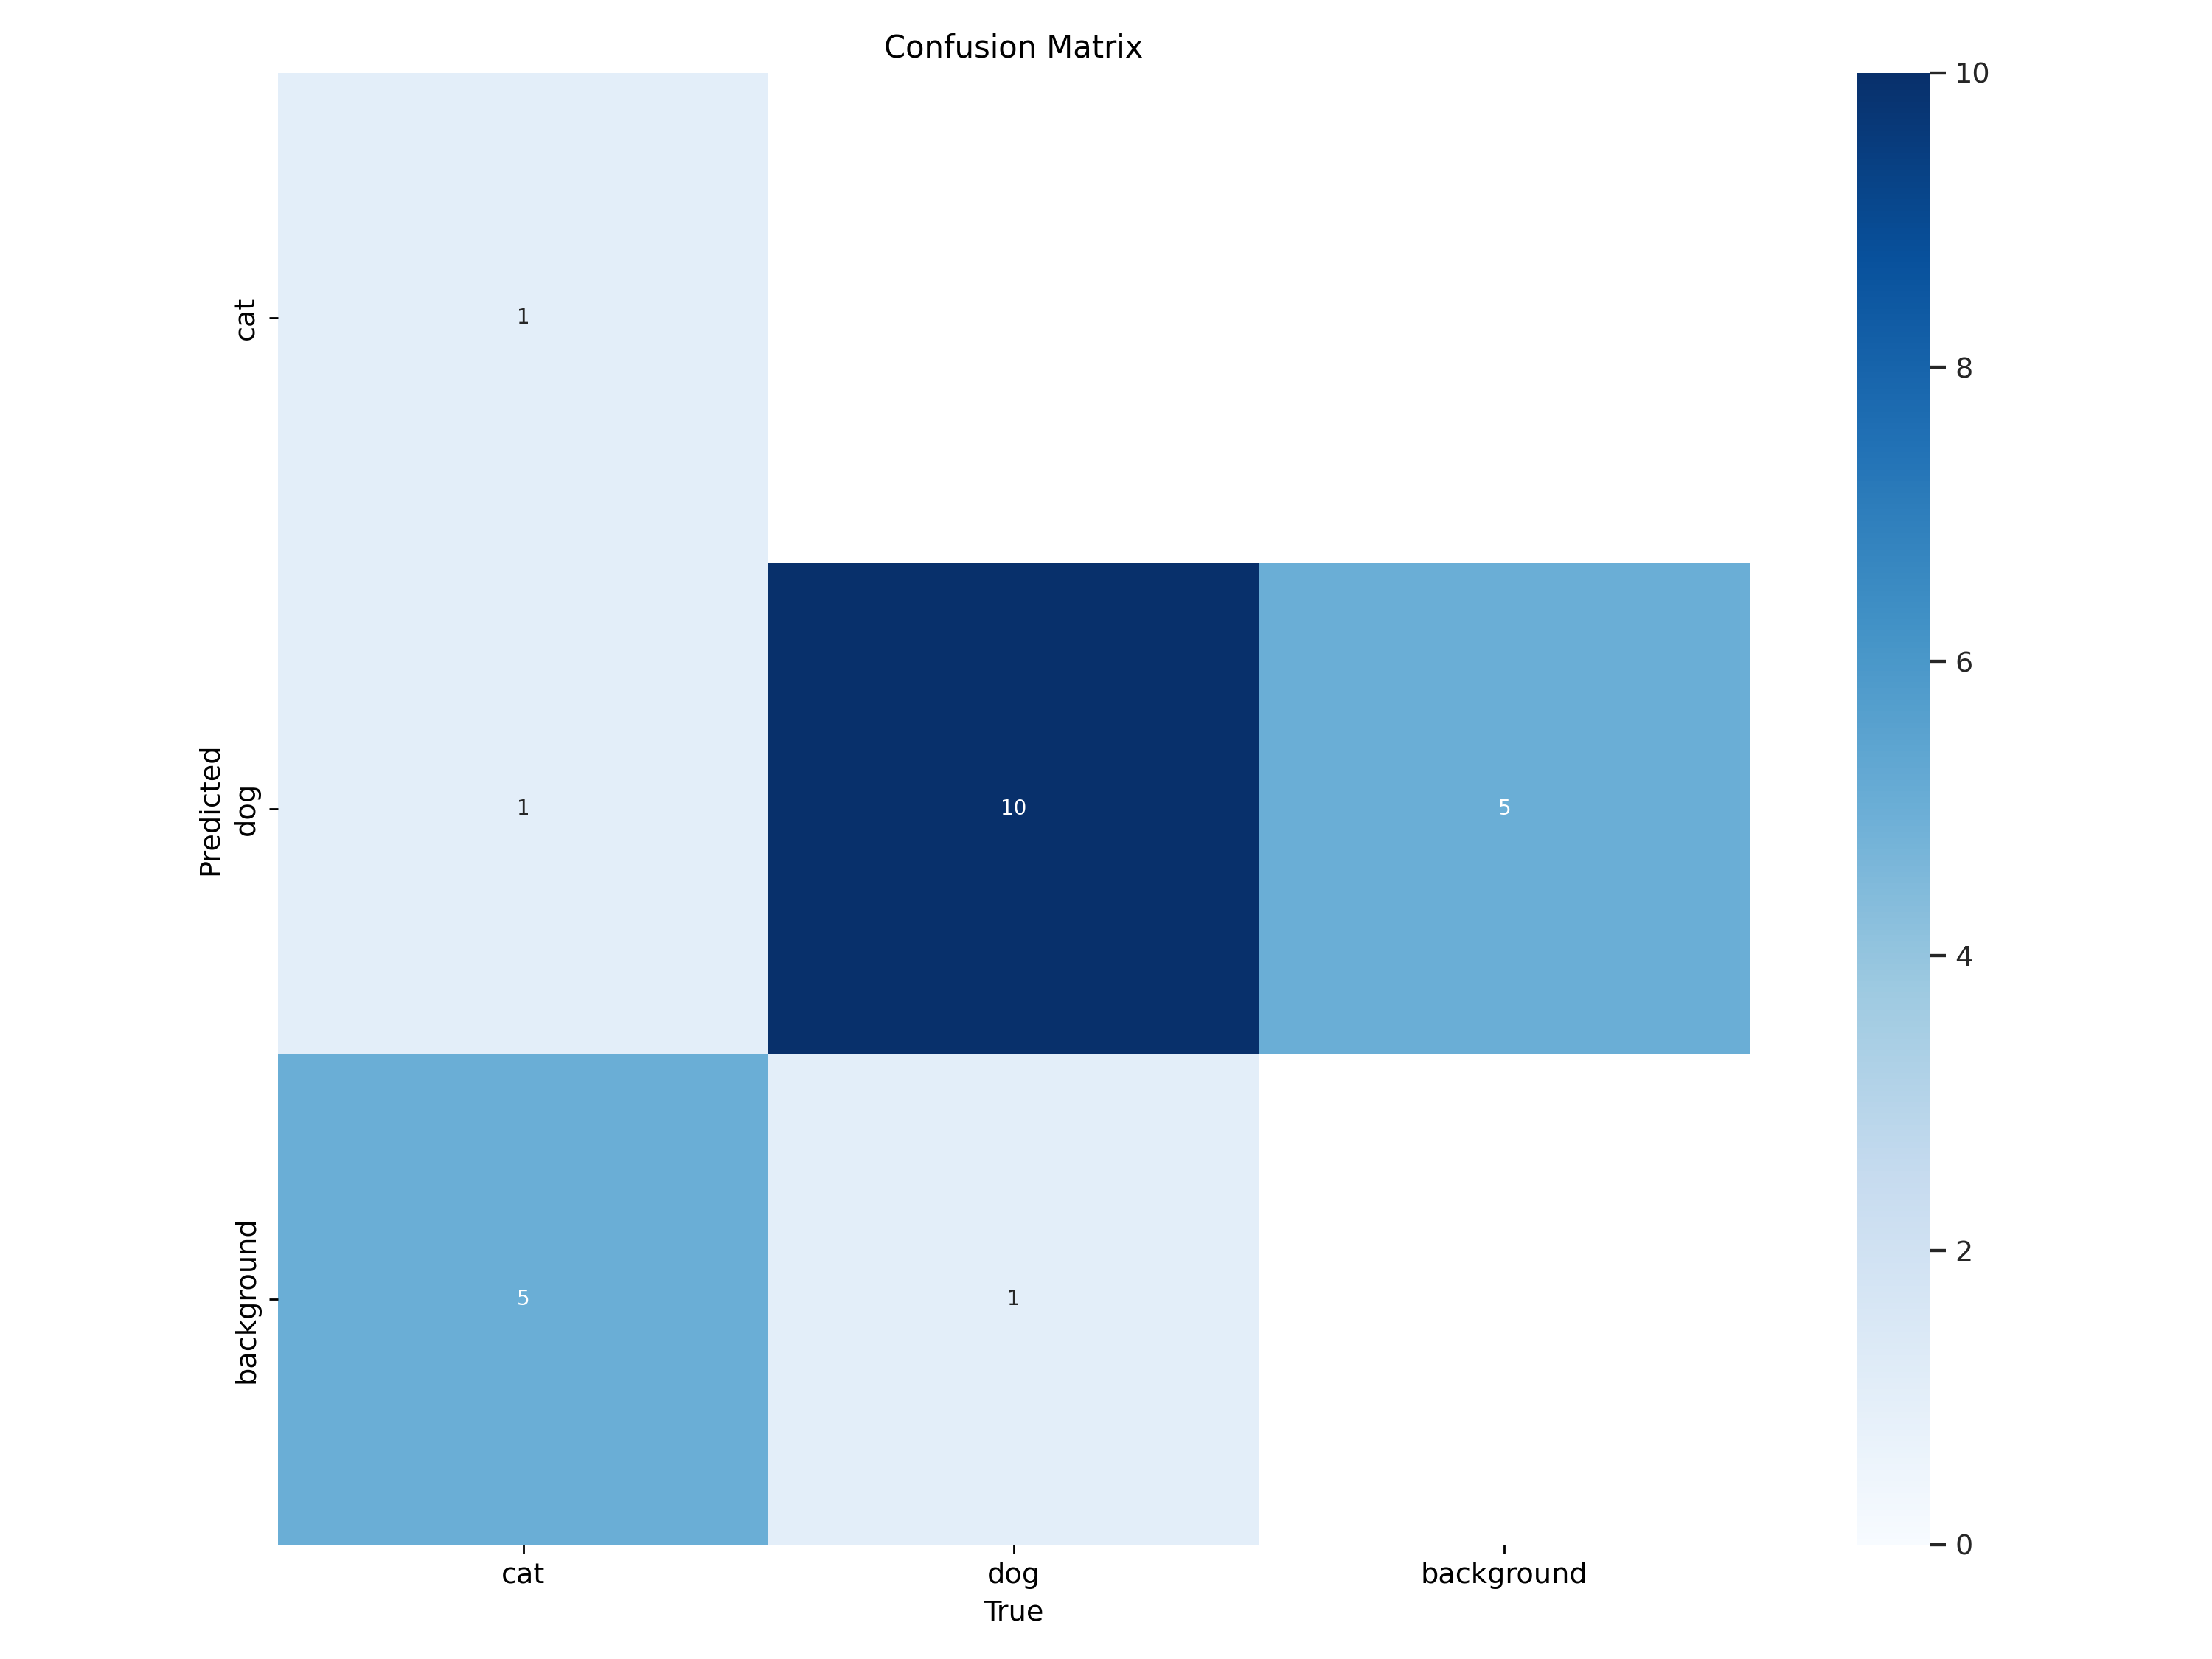

In [6]:
from IPython.display import Image
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

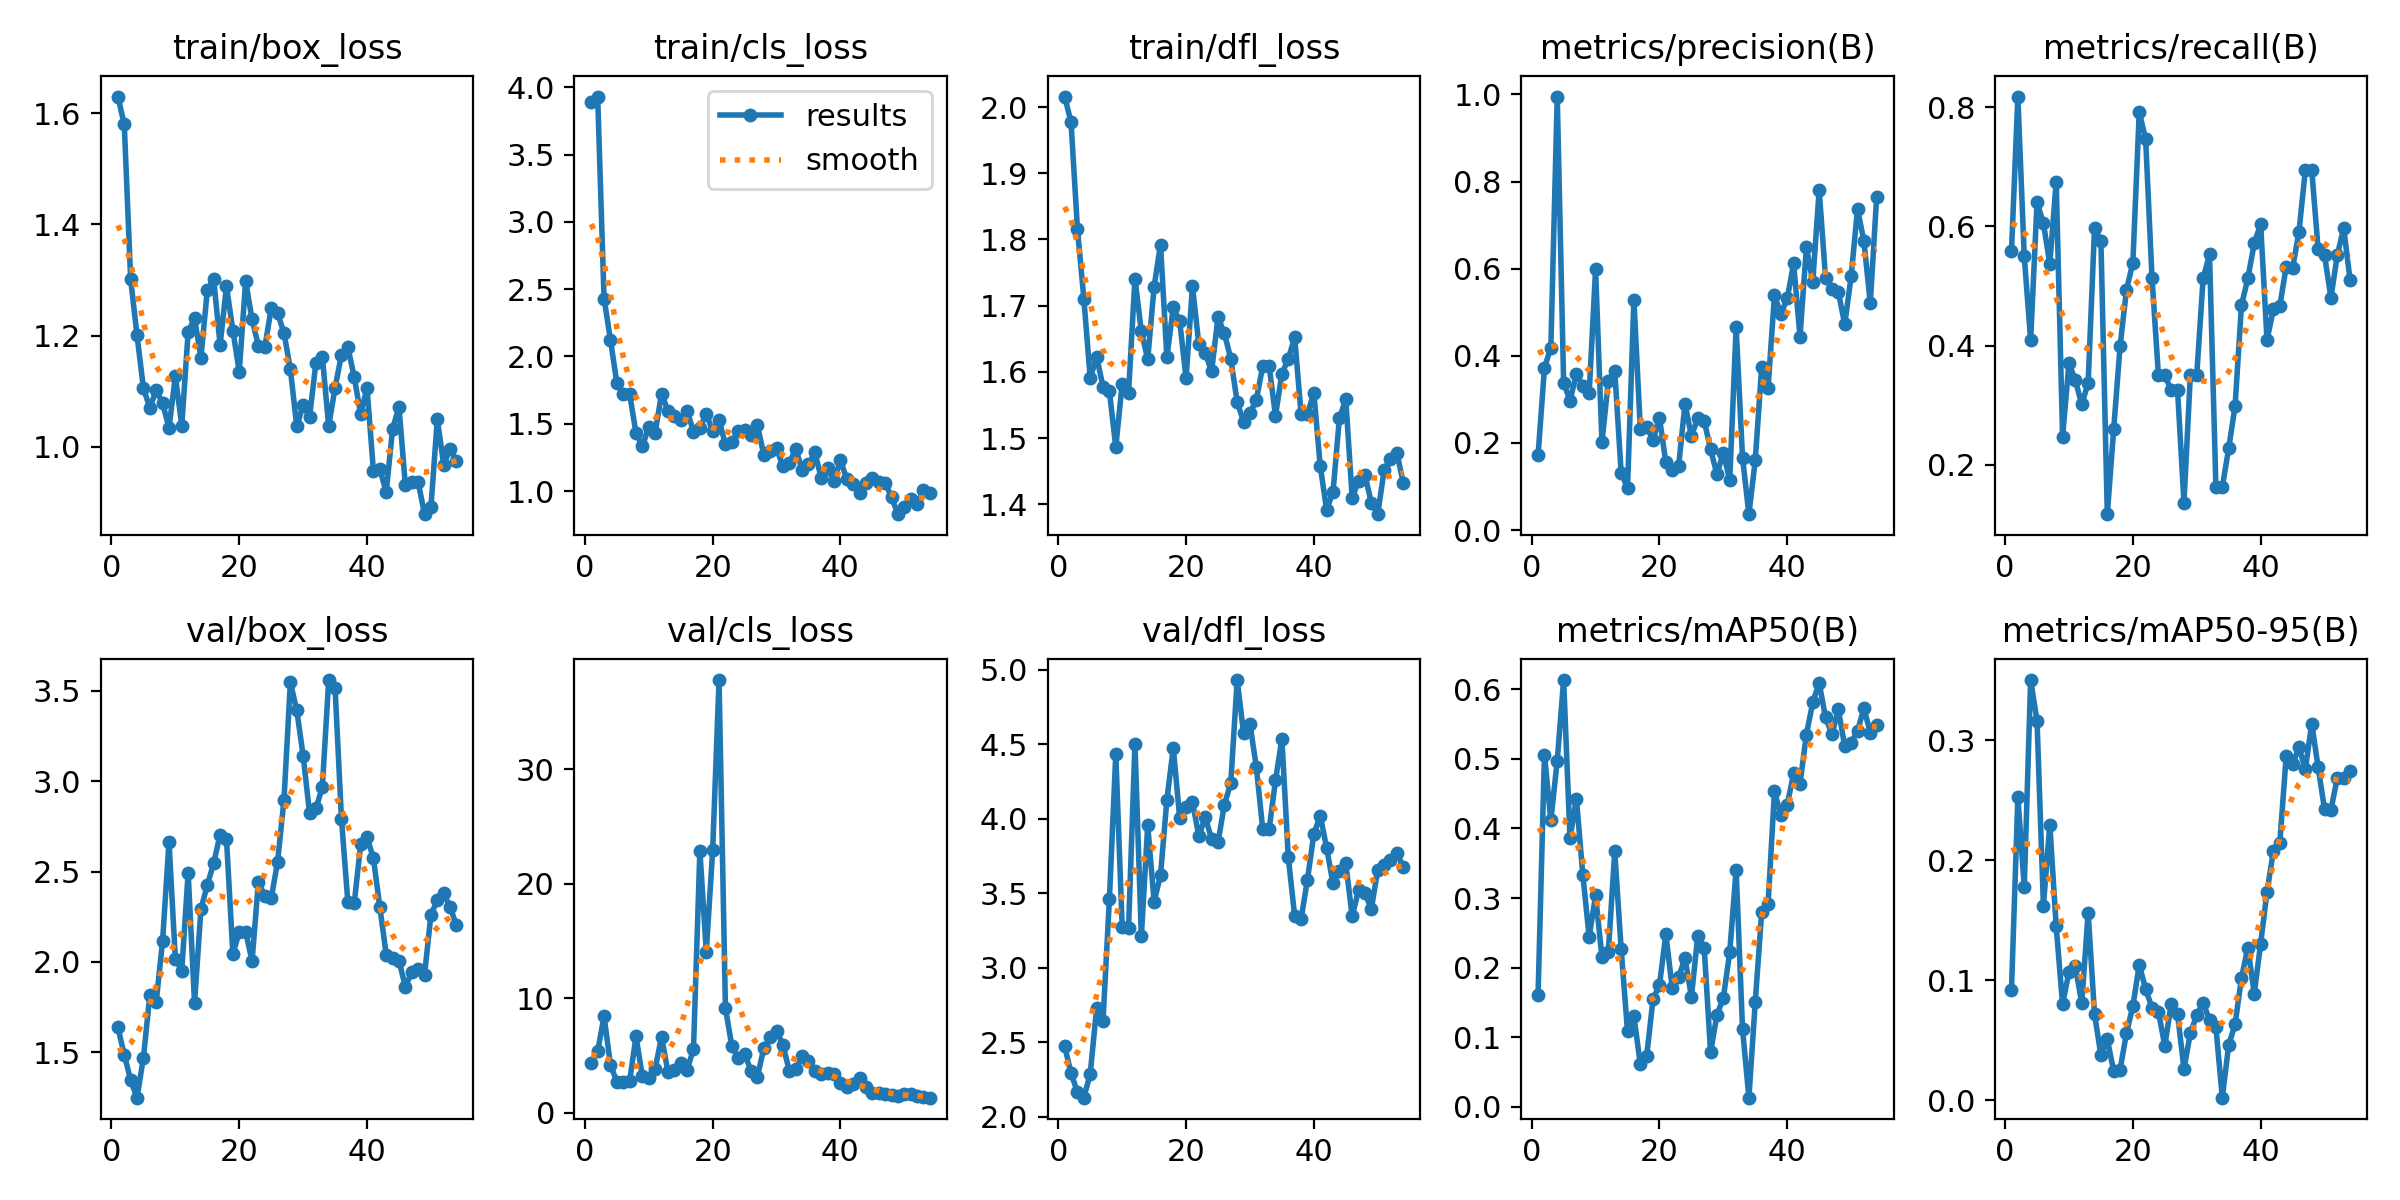

In [7]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [8]:
!yolo task=detect \
mode=val \
model=/content/runs/detect/train/weights/best.pt \
data={dataset.location}/data.yaml \
epochs=100 \
imgsz=640

Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Dogs-and-Cats-Lost-and-Found-1/valid/labels.cache... 18 images, 0 backgrounds, 0 corrupt: 100% 18/18 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:00<00:00,  2.01it/s]
                   all         18         18      0.995      0.409      0.498       0.35
                   cat         18          7          1          0      0.164      0.124
                   dog         18         11      0.991      0.818      0.831      0.577
Speed: 0.2ms preprocess, 28.5ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [11]:
!yolo task=detect \
mode=predict \
model=/content/runs/detect/train/weights/best.pt \
source=/content/prediction_images \
conf=0.25

Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/12 /content/prediction_images/29e.jpg: 384x640 1 cat, 104.0ms
image 2/12 /content/prediction_images/8hi.jpg: 480x640 2 cats, 1 dog, 65.4ms
image 3/12 /content/prediction_images/9k4.jpg: 448x640 1 cat, 64.7ms
image 4/12 /content/prediction_images/EZRMwvax_.jpg: 640x640 (no detections), 17.3ms
image 5/12 /content/prediction_images/ac1.jpg: 448x640 (no detections), 13.7ms
image 6/12 /content/prediction_images/bq5.jpg: 448x640 1 cat, 12.9ms
image 7/12 /content/prediction_images/c8t.jpg: 448x640 2 cats, 12.9ms
image 8/12 /content/prediction_images/d9i.jpg: 448x640 (no detections), 12.8ms
image 9/12 /content/prediction_images/n02088364_18403.jpg: 480x640 2 dogs, 13.8ms
image 10/12 /content/prediction_images/n02091635_1266.jpg: 544x640 1 dog, 61.4ms
image 11/12 /content/prediction_images/n02097658_633.jpg: 640x480 4 d